# AraFacts Dataset Analysis

This notebook processes and analyzes the AraFacts dataset for fact checking Arabic claims the goal is to clean, explore and potentially apply NLP techniques for fact classfiction.

# Enviroment set up and intilize path


In [ ]:
!pip install arabic-reshaper
!pip install python-bidi
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from arabic_reshaper import ArabicReshaper
reshaper = ArabicReshaper(
    {'language': 'Arabic'}
)
from bidi.algorithm import get_display
import numpy as np


# load the dataset and inspect its structure.
file_path = 'AraFacts.csv'

df = pd.read_csv(file_path)


In [ ]:
print(df)

       ClaimID                                              claim  \
0     MIS_2952  الشركة المالكة للعبة ببجي (PUBG) أعلنت يوم 26 ...   
1     MIS_2951  تصريح لمبابي يقول فيه "أريد أن أصبح مثل رونالد...   
2     FAT_1503                             وفاة الفنان يوسف شعبان   
3     MIS_2946  إضاءة شلالات نياغارا في كندا بألوان العلم الكو...   
4     MIS_2942  صورة لأصغر زوجين في الجزائر، تحديدًا من بلدة ت...   
...        ...                                                ...   
6217     VER_5  موقع روسيا اليوم يزوّر ويجتزئ أقوالاً لسوريين ...   
6218     VER_3  ناشطون أكراد يلفّقون ترجمة كاذبة لكة نائب كردي...   
6219     VER_4  مدير مستشفى القدس يُكذب رواية وزارة الدفاع الر...   
6220     VER_2  التسجيل اُتداول لكة أردوغان حول التدخل في سوري...   
6221     VER_1  مرشح الرئاسة الأمريكية "دونالد ترامب" أصوله أا...   

                                            description      source  \
0     تداول حساب على موقع التواصل الاجتماعي تيك توك،...      Misbar   
1     تتناقل صفحات وحسابات عل

#  Data Cleaning
We remove missing values and drop irrelevant columns.

In [ ]:
# drop nan

import pandas as pd

# Replace 'your_file.csv' with the actual path to your CSV file
file_path = 'AraFacts.csv'

df = pd.read_csv(file_path)

# Drop rows with any NaN values
df_no_nan = df.dropna()

df_no_nan

,ClaimID,claim,description,source,date,source_label,normalized_label,source_category,normalized_category,source_url,claim_urls,evidence_urls,claim_type
0,MIS_2952,الشركة المالكة للعبة ببجي (PUBG) أعلنت يوم 26 ...,تداول حساب على موقع التواصل الاجتماعي تيك توك،...,Misbar,2021-03-01,زائف,False,ترفيه,Other,https://misbar.com/factcheck/2021/03/01/لم-تعل...,"('https://www.youtube.com/watch?v=XQoJtu0VcnU',)",('https://twitter.com/PUBG/status/136483276092...,0
1,MIS_2951,"تصريح لمبابي يقول فيه ""أريد أن أصبح مثل رونالد...",تتناقل صفحات وحسابات على مواقع التواصل الاجتما...,Misbar,2021-03-01,مضلل,Partly-false,رياضة,Other,https://misbar.com/factcheck/2021/03/01/تغطية-...,('https://www.facebook.com/Al3mla2qalktalony/p...,('https://www.businessinsider.com/kylian-mbapp...,0
2,FAT_1503,وفاة الفنان يوسف شعبان,انتشر على مواقع التواصل الاجتماعي خبر مفاده ...,Fatabyyano,2021-02-28 21:12:12+00:00,correct,True,اجتماعي,Social,https://fatabyyano.net/وفاة-الفنان-يوسف-شعبان-...,(),(),0
3,MIS_2946,إضاءة شلالات نياغارا في كندا بألوان العلم الكو...,تتداول حسابات وصفحات، على موقع التواصل الاجتما...,Misbar,2021-02-28,مضلل,Partly-false,أخبار,Miscellaneous news,https://misbar.com/factcheck/2021/02/28/الفيدي...,('https://twitter.com/KuwaitNews/status/136543...,('https://www.hindustantimes.com/india-news/ca...,2
4,MIS_2942,صورة لأصغر زوجين في الجزائر، تحديدًا من بلدة ت...,تتداول صفحات وحسابات على مواقع التواصل الاجتما...,Misbar,2021-02-28,مضلل,Partly-false,أخبار,Miscellaneous news,https://misbar.com/factcheck/2021/02/28/الصورة...,('https://web.facebook.com/news.djelfa17/posts...,('https://web.facebook.com/265332067662712/vid...,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6203,FAT_4,الشجرة الملعونة المذكورة فى القرأن,سر الشجرة الملعونة التي تنبت ثمارا على شكل نسا...,Fatabyyano,2016-11-05 17:07:41+00:00,fake,False,علوم,General Sciences,https://fatabyyano.net/سر-الشجرة-الملعونة-التى...,(),"('https://goo.gl/ckYVaz',)",1
6204,FAT_3,جدة أنجبت طفل وهي في عام 101,هذه الجدة أنجبت طفل وهي في عامها 101 للأسف هذا...,Fatabyyano,2016-11-05 16:57:29+00:00,misleading-title,False,طبي,Health,https://fatabyyano.net/grandmother-gave-birth-...,(),"('https://dailym.ai/1Drmn7S',)",1
6205,FAT_1,بعد أن تلد أنثى الغزال تظهر في أسفل بطنها نتوء...,انتشر ادعاء أن المسك يستخرج من أنثى الغزال بعد...,Fatabyyano,2016-11-05 15:41:07+00:00,partially-fake,Partly-false,علوم,General Sciences,https://fatabyyano.net/غزال-المسك/,('https://www.facebook.com/2008418816066121/ph...,('https://www.facebook.com/2008418816066121/ph...,0
6206,FAT_2,""" محمد رشوان "" سبب شهرته يرجع لأولمبيّاد لوس أ...",ينتشر على أوساط التواصل الإجتماعي قصة لاعب الج...,Fatabyyano,2016-11-05 16:49:11+00:00,partially-fake,Partly-false,اجتماعي,Social,https://fatabyyano.net/محمد-رشوان/,('https://www.facebook.com/Elmarkeeez/posts/13...,('https://www.facebook.com/Elmarkeeez/posts/13...,0


In [ ]:
df = df_no_nan.drop(columns=['description','source','date','normalized_category','source_url','claim_urls','evidence_urls','claim_type'], axis=1)
print(df)


       ClaimID                                              claim  \
0     MIS_2952  الشركة المالكة للعبة ببجي (PUBG) أعلنت يوم 26 ...   
1     MIS_2951  تصريح لمبابي يقول فيه "أريد أن أصبح مثل رونالد...   
2     FAT_1503                             وفاة الفنان يوسف شعبان   
3     MIS_2946  إضاءة شلالات نياغارا في كندا بألوان العلم الكو...   
4     MIS_2942  صورة لأصغر زوجين في الجزائر، تحديدًا من بلدة ت...   
...        ...                                                ...   
6203     FAT_4                 الشجرة الملعونة المذكورة فى القرأن   
6204     FAT_3                       جدة أنجبت طفل وهي في عام 101   
6205     FAT_1  بعد أن تلد أنثى الغزال تظهر في أسفل بطنها نتوء...   
6206     FAT_2  " محمد رشوان " سبب شهرته يرجع لأولمبيّاد لوس أ...   
6207     MIS_1  الحكومة الأيسلندية تقرر منح 5 آلاف دولار شهريا...   

          source_label normalized_label source_category  
0                زائف             False           ترفيه  
1                مضلل      Partly-false           رياضة

# Preprocessing Steps




**URL Removal**

Remove any URLs present in the text using a regular expression.

In [ ]:
import re


df_no_nan.loc[:, 'claim'] = df_no_nan['claim'].apply(lambda x: re.sub(r'http\S+|www.\S+', '', x))


In [ ]:
!pip install arabic_reshaper
!pip install python-bidi
!pip install farasapy
!pip install farsa

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.2/72.2 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pefile: filename=pefile-2021.9.3-py3-none-any.whl size=68831 sha256=417450257785f27f3016a64ce2b7e0baa77927c8cf0427609c4d4859b2e87265
  Stored in directory: /root/.cache/pip/wheels/1c/8e/14/e2c575940ad6c14175fad5843da775da2b7719e6ebd1a11932
Successfully built pefile


In [ ]:

import re
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from farasa.stemmer import FarasaStemmer
from collections import Counter
import matplotlib.pyplot as plt
import nltk

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

# Load NLTK Arabic stopwords
arabic_stopwords = set(stopwords.words('arabic'))

# Extend stopwords with your custom list
custom_stopwords = {
    'و', 'في', 'من', 'علي', 'عن', 'ما', 'هذا', 'تلك', 'كما',
    'هي', 'هو', 'انا', 'نحن', 'ان', 'اذا', 'او', 'لكن', 'ثم', 'بل', 'الذي',
    'التي', 'الذين', 'كل', 'اي', 'بعد', 'قبل', 'كان', 'قد', 'ليس', 'مع',
    'عند', 'هنا', 'هناك', 'اذ', 'الي', 'ب', 'لم', 'لن', 'لا', 'ان', 'انه',
    'ايضا', 'هذه', 'هولا', 'انت', 'هم', 'كن', 'انتم', 'اين', 'حين',
    'كيف', 'كلما', 'بين', 'ام', 'ما', 'انما', 'بعض', 'مثل',
    'نفس', 'بلا', 'دون', 'حتي', 'اما', 'عبر', 'كلا', 'امام', 'حيث',
    'اذما', 'سوف', 'عندما', 'كلما', 'الذي', 'اللذين', 'اللتين', 'اللتان',
    'الاولي', 'ابدا', 'اثنا', 'الان', 'اقل', 'بسبب', 'بما', 'بماذا',
    'تحت', 'حسب', 'خلال', 'اكثر', 'اضافه', 'عليها', 'فيه', 'اليهم',
    'علينا', 'ذلك', 'الذي', 'لقد', 'والتي', 'والذي', 'وهو', 'وهي',
    'والذين', 'ومع', 'وحين', 'وحيث', 'ولقد', 'وذلك', 'وبسبب', 'وفيه', 'وماذا',
    'وبعض', 'وتحت', 'وهنا', 'ومن', 'وان', 'وامام', 'وكلا', 'وعلي', 'واين', 'وكما',
    'ولكن', 'وانما', 'والان', 'واثنا', 'وعند', 'وسوف', 'وبما', 'وتلك', 'وهذا',
    'وما', 'وعن', 'وفي', 'وبل', 'وليس', 'واذا', 'ونحن', 'وانا', 'وقد', 'وكان',
    'وقبل', 'وبعد', 'وكل', 'وانه', 'ولا', 'ولن', 'ولم', 'له','والي','الى', 'فى','واذ', 'وهناك',
    'واين', 'وانتم', 'وكن', 'وهم', 'وانت', 'انتي', 'وانتي', 'وهولا'
}
arabic_stopwords.update(custom_stopwords)

# Initialize the Farasa Stemmer
farasa_stemmer = FarasaStemmer(interactive=True)

# Function to refine prefixes and suffixes
def refine_prefix_suffix(words):
    # Remove prefixes only when the word is longer than 3 characters
    words = [re.sub(r'^(ال|و|ب|ف|ك|ل)(?!لله)(?!فبراير)', '', word) if len(word) > 3 else word for word in words]
    # Remove suffixes only when the word is longer than 2 characters
    words = [re.sub(r'(ة|ه|ها|وا|ين|ي)$', '', word) if len(word) > 2 else word for word in words]
    return words

# Function to apply stemming to words using Farasa
def apply_farasa_stemming(words):
    return [farasa_stemmer.stem(word) for word in words]

def clean_and_process_arabic_text(text):
    print("قبل التنظيف:", text)

    # Normalize Arabic characters
    text = re.sub(r'[إأآا]', 'ا', text)
    text = re.sub(r'ة', 'ه', text)
    text = re.sub(r'ى', 'ي', text)
    text = re.sub(r'ؤ', 'و', text)
    text = re.sub(r'ئ', 'ي', text)

    # Remove diacritics
    text = re.sub(r'[\u064B-\u065F]', '', text)

    # Remove punctuation and extra spaces
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()

    print("بعد التنظيف:", text)

    # Tokenize the text
    words = text.split()

    # Remove stopwords
    words = [word for word in words if word not in arabic_stopwords]

    # Remove prefixes and suffixes
    words = refine_prefix_suffix(words)

    # Apply stemming
    words = apply_farasa_stemming(words)

    return ' '.join(words)  # Return the final processed text



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[2025-02-01 13:36:55,596 - farasapy_logger - WARNING]: Be careful with large lines as they may break on interactive mode. You may switch to Standalone mode for such cases.


In [ ]:
# Create a new column to store the cleaned and tokenized text
df_no_nan['cleaned_claim'] = df_no_nan['claim'].apply(clean_and_process_arabic_text)

# Drop rows where cleaned and stemmed tokens are empty
articles_df = df_no_nan[df_no_nan['cleaned_claim'].str.strip() != '']

# Display the original and cleaned claims for comparison
print("Original and Cleaned Claims Comparison")
display(articles_df[['claim', 'cleaned_claim']].head())


Streaming output truncated to the last 5000 lines.
بعد التنظيف: اجتماع المخابرات التركيه مع محمد علي
قبل التنظيف: صورة رجل فيل تحملها سيدة أفريقية على رأسها لطبخها.
بعد التنظيف: صوره رجل فيل تحملها سيده افريقيه علي راسها لطبخها
قبل التنظيف: صورة تعرض الأراضي التي خسرتها "إسرائيل" منذ عام 1920 حتى 2020.
بعد التنظيف: صوره تعرض الاراضي التي خسرتها اسراييل منذ عام 1920 حتي 2020
قبل التنظيف: أنباء عن قيام ناسا بتحديث تواريخ الأبراج
بعد التنظيف: انباء عن قيام ناسا بتحديث تواريخ الابراج
قبل التنظيف: صورتان تعودان إلى وزيرة الصحة الهولندية.
بعد التنظيف: صورتان تعودان الي وزيره الصحه الهولنديه
قبل التنظيف: تصدى الجيش المصري للعناصر المسلحة في كمين رابعة في بئر العبد.
بعد التنظيف: تصدي الجيش المصري للعناصر المسلحه في كمين رابعه في بير العبد
قبل التنظيف: ملحد يتحدى الله على الهواء مباشرة.
بعد التنظيف: ملحد يتحدي الله علي الهواء مباشره
قبل التنظيف: مقطع فيديو لأردوغان يتحدث عن مصر والسيسي.
بعد التنظيف: مقطع فيديو لاردوغان يتحدث عن مصر والسيسي
قبل التنظيف: خبر عاجل في قناة الجزيرة "الإمارات تطلق مس

,claim,cleaned_claim
0,الشركة المالكة للعبة ببجي (PUBG) أعلنت يوم 26 ...,شرك مالك لعب بج PUBG أعلن يوم 26 برايرشباط آيت...
1,"تصريح لمبابي يقول فيه ""أريد أن أصبح مثل رونالد...",تصريح مباب قال أريد أصبح رونالدو ان مستحيل أصب...
2,وفاة الفنان يوسف شعبان,فا فنان يوسف شعبان
3,إضاءة شلالات نياغارا في كندا بألوان العلم الكو...,اضاء شلال نياغارا ند ألوان علم كويت مناسب ذكر ...
4,صورة لأصغر زوجين في الجزائر، تحديدًا من بلدة ت...,صورة أصغر زوج جزاير تحديد لد تسابيت لاي ادرار ...


**Tashkeel and Tatweel Removal**

Remove Arabic diacritics (Tashkeel) and Tatweel (elongation).


In [ ]:
def remove_tashkeel(text):
    tashkeel = re.compile(r'[\u0617-\u061A\u064B-\u0652]') # يلتقط كل رموز التشكيل (الحركات والرموز الصوتية).
    tatweel = re.compile(r'\u0640') #  يمثل المدّة (ـــــ)
    text = tashkeel.sub('', text)
    text = tatweel.sub('', text)
    return text

articles_df.loc[:,'cleaned_claim'] = articles_df['cleaned_claim'].apply(remove_tashkeel)


In [ ]:
articles_df["cleaned_claim"] = articles_df["claim"].apply(clean_and_process_arabic_text)

Streaming output truncated to the last 5000 lines.
قبل التنظيف: اجتماع المخابرات التركية مع محمد على.
بعد التنظيف: اجتماع المخابرات التركيه مع محمد علي
قبل التنظيف: صورة رجل فيل تحملها سيدة أفريقية على رأسها لطبخها.
بعد التنظيف: صوره رجل فيل تحملها سيده افريقيه علي راسها لطبخها
قبل التنظيف: صورة تعرض الأراضي التي خسرتها "إسرائيل" منذ عام 1920 حتى 2020.
بعد التنظيف: صوره تعرض الاراضي التي خسرتها اسراييل منذ عام 1920 حتي 2020
قبل التنظيف: أنباء عن قيام ناسا بتحديث تواريخ الأبراج
بعد التنظيف: انباء عن قيام ناسا بتحديث تواريخ الابراج
قبل التنظيف: صورتان تعودان إلى وزيرة الصحة الهولندية.
بعد التنظيف: صورتان تعودان الي وزيره الصحه الهولنديه
قبل التنظيف: تصدى الجيش المصري للعناصر المسلحة في كمين رابعة في بئر العبد.
بعد التنظيف: تصدي الجيش المصري للعناصر المسلحه في كمين رابعه في بير العبد
قبل التنظيف: ملحد يتحدى الله على الهواء مباشرة.
بعد التنظيف: ملحد يتحدي الله علي الهواء مباشره
قبل التنظيف: مقطع فيديو لأردوغان يتحدث عن مصر والسيسي.
بعد التنظيف: مقطع فيديو لاردوغان يتحدث عن مصر والسيسي
قبل 

**Currency Symbol Conversion**

Replace currency symbols with their Arabic word equivalents (e.g., $ -> "دولار").

In [ ]:
currency_mapping = {'$': 'دولار', '€': 'يورو', '£': 'جنيه'}
for symbol, word in currency_mapping.items():
    articles_df.loc[:,'cleaned_claim'] = articles_df['cleaned_claim'].str.replace(symbol, word)


**Number-to-Arabic Word Conversion**

Convert numbers to Arabic words

In [ ]:
def number_to_words_arabic(num):
    units = ["", "واحد", "اثنان", "ثلاثة", "أربعة", "خمسة", "ستة", "سبعة", "ثمانية", "تسعة"]
    tens = ["", "عشرة", "عشرون", "ثلاثون", "أربعون", "خمسون", "ستون", "سبعون", "ثمانون", "تسعون"]
    hundreds = ["", "مئة", "مئتان", "ثلاثمئة", "أربعمئة", "خمسمئة", "ستمئة", "سبعمئة", "ثمانمئة", "تسعمئة"]
    thousands = ["", "ألف", "ألفان", "آلاف"]
    millions = ["", "مليون", "مليونان", "ملايين"]

    def get_thousands_suffix(n):
        if 3 <= n <= 10:
            return "آلاف"
        elif n == 2:
            return "ألفان"
        else:
            return "ألف"

    if num < 10:
        return units[num]
    elif num < 100:
        tens_digit = num // 10
        unit_digit = num % 10
        if unit_digit == 0:
            return tens[tens_digit]
        else:
            return f"{units[unit_digit]} و{tens[tens_digit]}"
    elif num < 1000:
        hundreds_digit = num // 100
        remainder = num % 100
        if remainder == 0:
            return hundreds[hundreds_digit]
        else:
            return f"{hundreds[hundreds_digit]} و{number_to_words_arabic(remainder)}"
    elif num < 1000000:  # Handle thousands
        thousands_part = num // 1000
        remainder = num % 1000
        thousands_word = (
            f"{number_to_words_arabic(thousands_part)} {get_thousands_suffix(thousands_part)}"
            if thousands_part > 2
            else thousands[thousands_part]
        )
        if remainder == 0:
            return thousands_word
        else:
            return f"{thousands_word} و{number_to_words_arabic(remainder)}"
    elif num < 1000000000:  # Handle millions
        millions_part = num // 1000000
        remainder = num % 1000000
        millions_word = (
            f"{number_to_words_arabic(millions_part)} {millions[3]}"
            if millions_part > 2
            else millions[millions_part]
        )
        if remainder == 0:
            return millions_word
        else:
            return f"{millions_word} و{number_to_words_arabic(remainder)}"
    else:
        return str(num)  # Extend this logic for billions if needed

# Function to replace numbers in text
def convert_numbers_in_claim(text):
    import re
    # Regex to find numbers in the text
    numbers = re.findall(r'\d+', text)
    for num in numbers:
        num_in_words = number_to_words_arabic(int(num))
        # Replace the number with its word form in Arabic
        text = text.replace(num, num_in_words)
    return text

# Apply the function to the DataFrame
articles_df.loc[:,'cleaned_claim'] = articles_df['cleaned_claim'].apply(convert_numbers_in_claim)



In [ ]:
display(articles_df[['claim', 'cleaned_claim']].head())

,claim,cleaned_claim
0,الشركة المالكة للعبة ببجي (PUBG) أعلنت يوم 26 ...,شرك مالك لعب بج PUBG أعلن يوم ستة وعشرون براير...
1,"تصريح لمبابي يقول فيه ""أريد أن أصبح مثل رونالد...",تصريح مباب قال أريد أصبح رونالدو ان مستحيل أصب...
2,وفاة الفنان يوسف شعبان,فا فنان يوسف شعبان
3,إضاءة شلالات نياغارا في كندا بألوان العلم الكو...,اضاء شلال نياغارا ند ألوان علم كويت مناسب ذكر ...
4,صورة لأصغر زوجين في الجزائر، تحديدًا من بلدة ت...,صورة أصغر زوج جزاير تحديد لد تسابيت لاي ادرار ...


**Emoji Replacement**

Replace emojis with their textual description.

In [ ]:
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 27.2 MB/s eta 0:00:00


In [ ]:
import emoji
def replace_emojis(text):
    return emoji.demojize(text)

articles_df.loc[:,'cleaned_claim'] = articles_df['cleaned_claim'].apply(replace_emojis)


**Non-Arabic Character Removal**

Remove any non-Arabic characters to ensure the text only contains Arabic.

In [ ]:
articles_df['cleaned_claim'] = articles_df['cleaned_claim'].apply(
    lambda x: ', '.join([re.sub(r'[^\u0600-\u06FF\s]', '', token) for token in x.split(', ')])
)

In [ ]:
display(articles_df[['claim', 'cleaned_claim']].head())

,claim,cleaned_claim
0,الشركة المالكة للعبة ببجي (PUBG) أعلنت يوم 26 ...,شرك مالك لعب بج أعلن يوم ستة وعشرون برايرشباط...
1,"تصريح لمبابي يقول فيه ""أريد أن أصبح مثل رونالد...",تصريح مباب قال أريد أصبح رونالدو ان مستحيل أصب...
2,وفاة الفنان يوسف شعبان,فا فنان يوسف شعبان
3,إضاءة شلالات نياغارا في كندا بألوان العلم الكو...,اضاء شلال نياغارا ند ألوان علم كويت مناسب ذكر ...
4,صورة لأصغر زوجين في الجزائر، تحديدًا من بلدة ت...,صورة أصغر زوج جزاير تحديد لد تسابيت لاي ادرار ...


In [ ]:
import pandas as pd

articles_df[['claim', 'cleaned_claim','source_label','normalized_label', 'source_category' ]].to_csv('cleaned_claim.csv', index=False)

**cleaned claims**

Save the DataFrame with both original and cleaned claims

In [ ]:
from collections import Counter
from itertools import chain
import matplotlib.pyplot as plt

In [ ]:

articles_df.to_csv('original_and_cleaned_claims.csv', index=False, encoding='utf-8')
print("Original and cleaned claims saved to 'original_and_cleaned_claims.csv'.")

# Directly flatten the tokenized lists
all_tokens = list(chain.from_iterable(articles_df['cleaned_claim']))

# Compute word counts
word_counts = Counter(all_tokens)



Original and cleaned claims saved to 'original_and_cleaned_claims.csv'.


In [ ]:
clean_file_path = 'original_and_cleaned_claims.csv'
clean_df = pd.read_csv(clean_file_path)
clean_df

,ClaimID,claim,description,source,date,source_label,normalized_label,source_category,normalized_category,source_url,claim_urls,evidence_urls,claim_type,cleaned_claim
0,MIS_2952,الشركة المالكة للعبة ببجي (PUBG) أعلنت يوم 26 ...,تداول حساب على موقع التواصل الاجتماعي تيك توك،...,Misbar,2021-03-01,زائف,False,ترفيه,Other,https://misbar.com/factcheck/2021/03/01/لم-تعل...,"('https://www.youtube.com/watch?v=XQoJtu0VcnU',)",('https://twitter.com/PUBG/status/136483276092...,0,"شرك, مالك, لعب, ببج, , أعلن, يوم, وعشرون, فبرا..."
1,MIS_2951,"تصريح لمبابي يقول فيه ""أريد أن أصبح مثل رونالد...",تتناقل صفحات وحسابات على مواقع التواصل الاجتما...,Misbar,2021-03-01,مضلل,Partly-false,رياضة,Other,https://misbar.com/factcheck/2021/03/01/تغطية-...,('https://www.facebook.com/Al3mla2qalktalony/p...,('https://www.businessinsider.com/kylian-mbapp...,0,"تصريح, مباب, قال, أريد, أصبح, رونالدو, لان, مس..."
2,FAT_1503,وفاة الفنان يوسف شعبان,انتشر على مواقع التواصل الاجتماعي خبر مفاده ...,Fatabyyano,2021-02-28 21:12:12+00:00,correct,True,اجتماعي,Social,https://fatabyyano.net/وفاة-الفنان-يوسف-شعبان-...,(),(),0,"وفا, فنان, يوسف, شعبان"
3,MIS_2946,إضاءة شلالات نياغارا في كندا بألوان العلم الكو...,تتداول حسابات وصفحات، على موقع التواصل الاجتما...,Misbar,2021-02-28,مضلل,Partly-false,أخبار,Miscellaneous news,https://misbar.com/factcheck/2021/02/28/الفيدي...,('https://twitter.com/KuwaitNews/status/136543...,('https://www.hindustantimes.com/india-news/ca...,2,"اضاء, شلال, نياغارا, كندا, لون, علم, كويت, منا..."
4,MIS_2942,صورة لأصغر زوجين في الجزائر، تحديدًا من بلدة ت...,تتداول صفحات وحسابات على مواقع التواصل الاجتما...,Misbar,2021-02-28,مضلل,Partly-false,أخبار,Miscellaneous news,https://misbar.com/factcheck/2021/02/28/الصورة...,('https://web.facebook.com/news.djelfa17/posts...,('https://web.facebook.com/265332067662712/vid...,1,"صورة, اصغر, زوج, جزاىر, تحديد, بلد, تسابيت, لا..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6217,VER_5,موقع روسيا اليوم يزوّر ويجتزئ أقوالاً لسوريين ...,نشر موقع قناة روسيا اليوم ترجمة لأجزاء من تقري...,Verify-sy,2016-05-09,NaN,False,منوعات,Miscellaneous news,https://www.verify-sy.com/details/426/%D9%85%D...,(),(),0,"موقع, روسيا, يوم, زار, يجتزى, اقوال, سوري, تقر..."
6218,VER_3,ناشطون أكراد يلفّقون ترجمة كاذبة لكة نائب كردي...,نشر نشطاء أكراد تسجيلاً مصوراً لمداخلة في البر...,Verify-sy,2016-05-05,NaN,False,سياسة,Politics,https://www.verify-sy.com/details/415/%D9%86%D...,(),(),1,"ناشط, أكراد, يلفق, ترجم, كاذب, ل, ناىب, رد, بران"
6219,VER_4,مدير مستشفى القدس يُكذب رواية وزارة الدفاع الر...,نقل موقع قناة روسيا اليوم عن وزارة الدفاع الرو...,Verify-sy,2016-05-05,NaN,False,في الميدان,Politics,https://verify-sy.com/details/1610/%D9%85%D8%A...,(),(),1,"مدير, مستشف, قدس, كذب, رواي, زار, دفاع, روسي, ..."
6220,VER_2,التسجيل اُتداول لكة أردوغان حول التدخل في سوري...,"نشرت صفحة فايسبوك تحمل اسم ""قناة الجزيرة مباشر...",Verify-sy,2016-04-29,NaN,False,سياسة,Politics,https://www.verify-sy.com/details/385/%D8%A7%D...,(),(),2,"تسجيل, اتداول, ل, اردوغان, حول, تدخل, سوريا, م..."


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
tfidf = TfidfVectorizer()

# Fit and transform the cleaned_claim column
tfidf_matrix = tfidf.fit_transform(articles_df['cleaned_claim'])

# Get feature names (words) and their scores
feature_names = tfidf.get_feature_names_out()
tfidf_scores = tfidf_matrix.sum(axis=0).A1

# Create a DataFrame for TF-IDF scores
tfidf_df = pd.DataFrame({'word': feature_names, 'score': tfidf_scores})

# Get the 20 most significant words
most_significant_words = tfidf_df.sort_values(by='score', ascending=False).head(20)
print(most_significant_words)


        word       score
5032    صورة  153.270348
6425  كورونا  116.312934
5920   فيديو  110.186421
4193    رىيس   74.852206
5739  فايروس   71.761246
7395     مصر   70.079462
8634   وعشرة   66.144911
5228     ظهر   62.221252
5173     طفل   57.914640
5030     صور   55.942656
7614    مقطع   53.434916
7252   مستجد   49.452095
5272     عام   48.905874
5968   فيروس   45.436364
5269    عالم   42.887595
4610    سوري   42.370529
1444     الل   41.637875
7123    مدين   41.588367
3858    دولة   41.262802
5134    طاىر   40.622814


# Visulaize the dataset

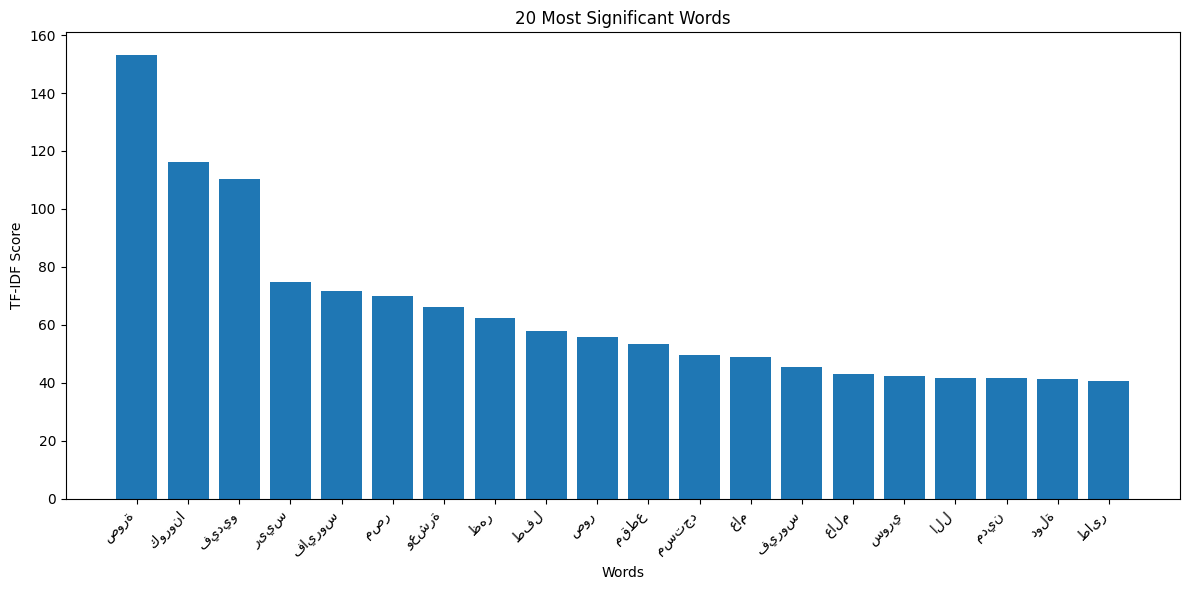

In [ ]:
import matplotlib.pyplot as plt

# Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(most_significant_words['word'], most_significant_words['score'])
plt.xlabel("Words")
plt.ylabel("TF-IDF Score")
plt.title("20 Most Significant Words")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [ ]:
!!pip install arabic-reshaper
!pip install python-bidi
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from arabic_reshaper import ArabicReshaper
from bidi.algorithm import get_display
import os
import re

reshaper_config = {
    'language': 'Arabic',
    'support_ligatures': True,
    'delete_harakat': False
}
reshaper = ArabicReshaper(reshaper_config)

font_path = 'NotoNaskhArabic.ttf'
if not os.path.exists(font_path):
    !wget "https://noto-website-2.storage.googleapis.com/pkgs/NotoNaskhArabic-unhinted.zip"
    !unzip NotoNaskhArabic-unhinted.zip
    font_path = 'NotoNaskhArabic-Regular.ttf'

def arabic_text_processor(text):
    text = re.sub(r'http\S+|www.\S+|[^\w\s]', '', text)
    reshaped = reshaper.reshape(text)
    bidi_text = get_display(reshaped)
    return bidi_text


text = ' '.join(articles_df['cleaned_claim'])
processed_text = arabic_text_processor(text)

wordcloud = WordCloud(
    font_path=font_path,
    width=2000,
    height=1000,
    background_color='white',
    collocations=False,
    regexp=r"[\w']+",
    font_step=2
).generate(processed_text)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("سحابة الكلمات بعد المعالجة", fontproperties=font_path, size=24)
plt.show()

--2025-01-31 22:19:31--  https://github.com/googlefonts/amiri/releases/download/1.000/Amiri-1.000.zip
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2025-01-31 22:19:31 ERROR 404: Not Found.

unzip:  cannot find or open Amiri-1.000.zip, Amiri-1.000.zip.zip or Amiri-1.000.zip.ZIP.


OSError: cannot open resource

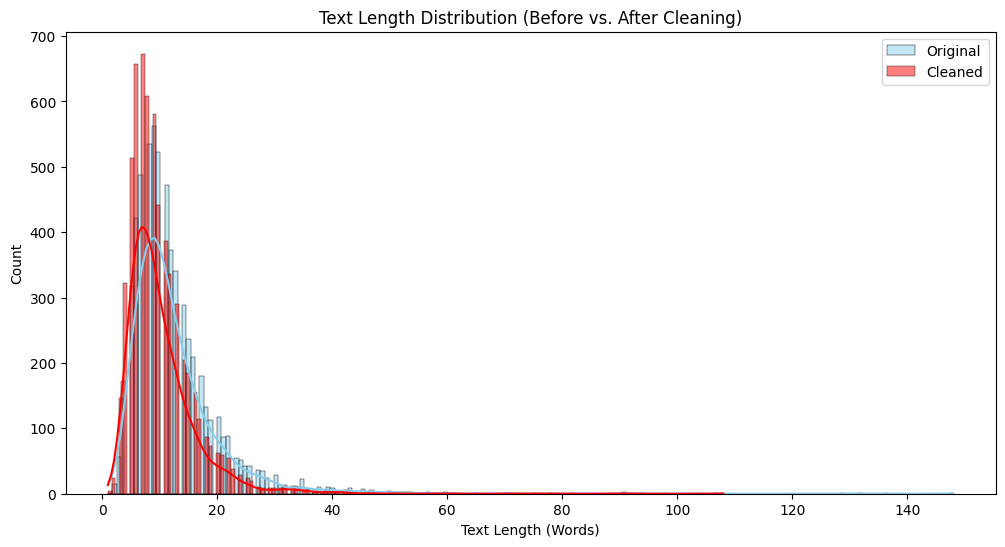

In [ ]:
articles_df['original_length'] = articles_df['claim'].apply(lambda x: len(x.split()))
articles_df['cleaned_length'] = articles_df['cleaned_claim'].apply(lambda x: len(x.split()))  # Use articles_df

plt.figure(figsize=(12, 6))
sns.histplot(articles_df['original_length'], color="skyblue", label="Original", kde=True)
sns.histplot(articles_df['cleaned_length'], color="red", label="Cleaned", kde=True)
plt.title("Text Length Distribution (Before vs. After Cleaning)")
plt.xlabel("Text Length (Words)")
plt.legend()
plt.show()

In [ ]:


cleand_path = 'original_and_cleaned_claims.csv'  # Verify the correct file path

try:
    df1 = pd.read_csv(cleand_path, encoding='utf-8')  # Attempt to read the CSV
    print(df1)  # Print the DataFrame if successful
except pd.errors.EmptyDataError:
    print(f"Error: The file '{cleand_path}' is empty or has no parsable data.")
    # Handle the error, e.g., create an empty DataFrame, skip processing, etc.
except FileNotFoundError:
    print(f"Error: The file '{cleand_path}' was not found.")
    # Handle the file not found error

       ClaimID                                              claim  \
0     MIS_2952  الشركة المالكة للعبة ببجي (PUBG) أعلنت يوم 26 ...   
1     MIS_2951  تصريح لمبابي يقول فيه "أريد أن أصبح مثل رونالد...   
2     FAT_1503                             وفاة الفنان يوسف شعبان   
3     MIS_2946  إضاءة شلالات نياغارا في كندا بألوان العلم الكو...   
4     MIS_2942  صورة لأصغر زوجين في الجزائر، تحديدًا من بلدة ت...   
...        ...                                                ...   
6217     VER_5  موقع روسيا اليوم يزوّر ويجتزئ أقوالاً لسوريين ...   
6218     VER_3  ناشطون أكراد يلفّقون ترجمة كاذبة لكة نائب كردي...   
6219     VER_4  مدير مستشفى القدس يُكذب رواية وزارة الدفاع الر...   
6220     VER_2  التسجيل اُتداول لكة أردوغان حول التدخل في سوري...   
6221     VER_1  مرشح الرئاسة الأمريكية "دونالد ترامب" أصوله أا...   

                                            description      source  \
0     تداول حساب على موقع التواصل الاجتماعي تيك توك،...      Misbar   
1     تتناقل صفحات وحسابات عل

# Text Classification

In [ ]:
import pandas as pd
cleand_path = 'original_and_cleaned_claims.csv'
df = pd.read_csv(cleand_path)
print(df)

       ClaimID                                              claim  \
0     MIS_2952  الشركة المالكة للعبة ببجي (PUBG) أعلنت يوم 26 ...   
1     MIS_2951  تصريح لمبابي يقول فيه "أريد أن أصبح مثل رونالد...   
2     FAT_1503                             وفاة الفنان يوسف شعبان   
3     MIS_2946  إضاءة شلالات نياغارا في كندا بألوان العلم الكو...   
4     MIS_2942  صورة لأصغر زوجين في الجزائر، تحديدًا من بلدة ت...   
...        ...                                                ...   
6217     VER_5  موقع روسيا اليوم يزوّر ويجتزئ أقوالاً لسوريين ...   
6218     VER_3  ناشطون أكراد يلفّقون ترجمة كاذبة لكة نائب كردي...   
6219     VER_4  مدير مستشفى القدس يُكذب رواية وزارة الدفاع الر...   
6220     VER_2  التسجيل اُتداول لكة أردوغان حول التدخل في سوري...   
6221     VER_1  مرشح الرئاسة الأمريكية "دونالد ترامب" أصوله أا...   

                                            description      source  \
0     تداول حساب على موقع التواصل الاجتماعي تيك توك،...      Misbar   
1     تتناقل صفحات وحسابات عل

In [ ]:
category_counts = df['normalized_label'].value_counts()

# If you want to display it more clearly:
for category, count in category_counts.items():
    print(f"Category: {category}, Rows: {count}")


Category: False, Rows: 4037
Category: Partly-false, Rows: 1891
Category: True, Rows: 198
Category: Sarcasm, Rows: 90
Category: Unverifiable, Rows: 6


<ipython-input-45-17326c40599f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")


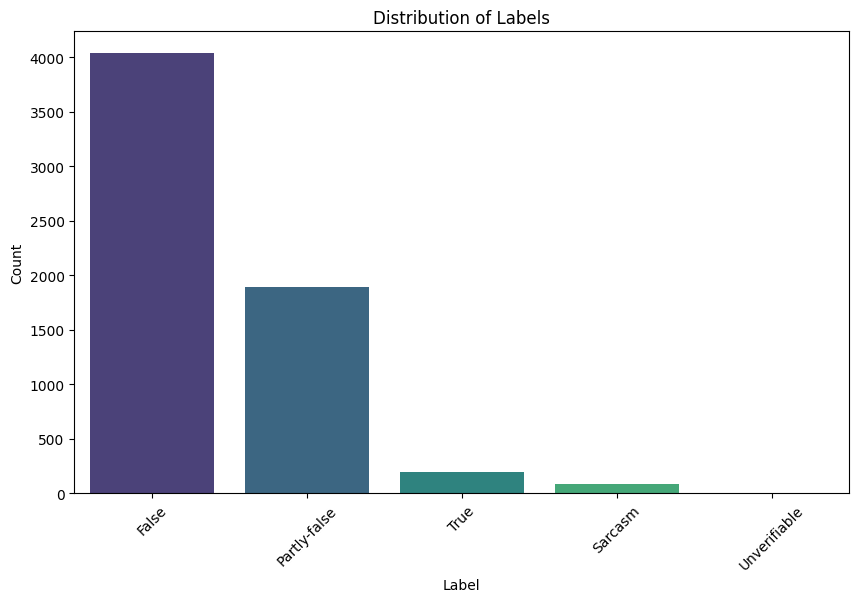

In [ ]:
# Class distribution plot
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")
plt.title("Distribution of Labels")
plt.xlabel("Label")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Define label mapping
label_mapping = {
    "FALSE": 0,
    "Partly-false": 1,
    "TRUE": 2,
    "Sarcasm": 3,
    "Unverifiable": 4,
}



# Apply label mapping
df['Mapped_Label'] = df['normalized_label'].map(label_mapping)

print(df)

       ClaimID                                              claim  \
0     MIS_2952  الشركة المالكة للعبة ببجي (PUBG) أعلنت يوم 26 ...   
1     MIS_2951  تصريح لمبابي يقول فيه "أريد أن أصبح مثل رونالد...   
2     FAT_1503                             وفاة الفنان يوسف شعبان   
3     MIS_2946  إضاءة شلالات نياغارا في كندا بألوان العلم الكو...   
4     MIS_2942  صورة لأصغر زوجين في الجزائر، تحديدًا من بلدة ت...   
...        ...                                                ...   
6217     VER_5  موقع روسيا اليوم يزوّر ويجتزئ أقوالاً لسوريين ...   
6218     VER_3  ناشطون أكراد يلفّقون ترجمة كاذبة لكة نائب كردي...   
6219     VER_4  مدير مستشفى القدس يُكذب رواية وزارة الدفاع الر...   
6220     VER_2  التسجيل اُتداول لكة أردوغان حول التدخل في سوري...   
6221     VER_1  مرشح الرئاسة الأمريكية "دونالد ترامب" أصوله أا...   

                                            description      source  \
0     تداول حساب على موقع التواصل الاجتماعي تيك توك،...      Misbar   
1     تتناقل صفحات وحسابات عل

In [ ]:
df = df.drop(columns=['ClaimID','claim','description','source','date','source_label','source_category','normalized_category','source_url','claim_urls','evidence_urls','claim_type'], axis=1)
print(df)

     normalized_label                                      cleaned_claim  \
0               False  شرك, مالك, لعب, ببج, , أعلن, يوم, وعشرون, فبرا...   
1        Partly-false  تصريح, مباب, قال, أريد, أصبح, رونالدو, لان, مس...   
2                True                             وفا, فنان, يوسف, شعبان   
3        Partly-false  اضاء, شلال, نياغارا, كندا, لون, علم, كويت, منا...   
4        Partly-false  صورة, اصغر, زوج, جزاىر, تحديد, بلد, تسابيت, لا...   
...               ...                                                ...   
6217            False  موقع, روسيا, يوم, زار, يجتزى, اقوال, سوري, تقر...   
6218            False   ناشط, أكراد, يلفق, ترجم, كاذب, ل, ناىب, رد, بران   
6219            False  مدير, مستشف, قدس, كذب, رواي, زار, دفاع, روسي, ...   
6220            False  تسجيل, اتداول, ل, اردوغان, حول, تدخل, سوريا, م...   
6221            False  مرشح, رىاس, أمريكي, دونالد, ترامب, أصول, ااني,...   

      Mapped_Label  
0              NaN  
1              1.0  
2              NaN  
3  

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

model_name = "aubmindlab/bert-base-arabertv2"  # AraBERT
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/611 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/384 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/720k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.31M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/543M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at aubmindlab/bert-base-arabertv2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from sklearn.model_selection import train_test_split

# تقسيم البيانات إلى تدريب (80%) واختبار (20%)
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# تقسيم التدريب إلى تدريب (90%) وتحقق (10%)
train_df, val_df = train_test_split(train_df, test_size=0.1, random_state=42)

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
train_df['normalized_label'] = label_encoder.fit_transform(train_df['normalized_label'])
val_df['normalized_label'] = label_encoder.transform(val_df['normalized_label'])
test_df['normalized_label'] = label_encoder.transform(test_df['normalized_label'])

In [ ]:
!pip install datasets
def tokenize_function(examples):
    return tokenizer(examples['cleaned_claim'], padding="max_length", truncation=True, max_length=128,
                      return_tensors="pt")

# تحويل DataFrames إلى Hugging Face Dataset
from datasets import Dataset
train_dataset = Dataset.from_pandas(train_df)
val_dataset = Dataset.from_pandas(val_df)
test_dataset = Dataset.from_pandas(test_df)


tokenized_train = train_dataset.map(tokenize_function, batched=True)
tokenized_val = val_dataset.map(tokenize_function, batched=True)
tokenized_test = test_dataset.map(tokenize_function, batched=True)

tokenized_train = train_dataset.map(tokenize_function, batched=True)
tokenized_train = tokenized_train.rename_column("normalized_label", "labels") # Rename the column to 'labels'
tokenized_train.set_format("torch", columns=["input_ids", "attention_mask", "labels"]) # Set the format to PyTorch

tokenized_val = val_dataset.map(tokenize_function, batched=True)
tokenized_val = tokenized_val.rename_column("normalized_label", "labels")
tokenized_val.set_format("torch", columns=["input_ids", "attention_mask", "labels"])

tokenized_test = test_dataset.map(tokenize_function, batched=True)
tokenized_test = tokenized_test.rename_column("normalized_label", "labels")
tokenized_test.set_format("torch", columns=["input_ids", "attention_mask", "labels"])

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 18.0 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.5.1+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.5.1+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_syst

Map:   0%|          | 0/4479 [00:00<?, ? examples/s]

Map:   0%|          | 0/498 [00:00<?, ? examples/s]

Map:   0%|          | 0/1245 [00:00<?, ? examples/s]

Map:   0%|          | 0/4479 [00:00<?, ? examples/s]

Map:   0%|          | 0/498 [00:00<?, ? examples/s]

Map:   0%|          | 0/1245 [00:00<?, ? examples/s]

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

model_name = "aubmindlab/bert-base-arabertv2"  # AraBERT
tokenizer = AutoTokenizer.from_pretrained(model_name)
# The num_labels argument should match the number of unique labels in your dataset
num_labels = len(label_mapping)  # Get the number of unique labels
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=num_labels)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at aubmindlab/bert-base-arabertv2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from transformers import TrainingArguments, Trainer
import torch
training_args = TrainingArguments(
    output_dir="./results",
    report_to="none",
    num_train_epochs=5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    learning_rate=2e-5,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    metric_for_best_model="f1",
    logging_steps=100,
)

# Define a custom compute_loss function
def compute_loss(model, inputs, return_outputs=False):
    """
    This function calculates the loss during training.

    Args:
        model: The model being trained.
        inputs: A dictionary of inputs to the model.
        return_outputs: Whether to return the model outputs along with the loss.

    Returns:
        The loss value, or a tuple of (loss, outputs) if return_outputs is True.
    """
    labels = inputs.get("labels")  # Extract labels from inputs
    # Forward pass: Get model outputs
    outputs = model(**inputs)

    # Calculate the loss
    # Assuming you are using cross-entropy loss for classification
    loss_fct = torch.nn.CrossEntropyLoss()

    # Ensure labels and logits have the correct shape and type
    logits = outputs.logits

    # Reshape logits to [batch_size, num_labels]
    # and labels to [batch_size]
    loss = loss_fct(logits.view(-1, model.config.num_labels), labels.view(-1))


    return (loss, outputs) if return_outputs else loss

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def compute_metrics(p):
    predictions, labels = p
    predictions = np.argmax(predictions, axis=1)
    return {
        "accuracy": accuracy_score(labels, predictions),
        "f1": f1_score(labels, predictions, average="weighted"),
        "precision": precision_score(labels, predictions, average="weighted"),
        "recall": recall_score(labels, predictions, average="weighted"),
    }

In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_val,
    compute_metrics=compute_metrics,
)

trainer.train()

Epoch,Training Loss,Validation Loss


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-56-5dd2ad2f9bc7>", line 9, in <cell line: 0>
    trainer.train()
  File "/usr/local/lib/python3.11/dist-packages/transformers/trainer.py", line 2164, in train
    return inner_training_loop(
           ^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/transformers/trainer.py", line 2524, in _inner_training_loop
    tr_loss_step = self.training_step(model, inputs, num_items_in_batch)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/transformers/trainer.py", line 3687, in training_step
    self.accelerator.backward(loss, **kwargs)
  File "/usr/local/lib/python3.11/dist-packages/accelerate/accelerator.py", line 2248, in backward
    loss.backward(**kwargs)
  File "/usr/local/lib/python

TypeError: object of type 'NoneType' has no len()

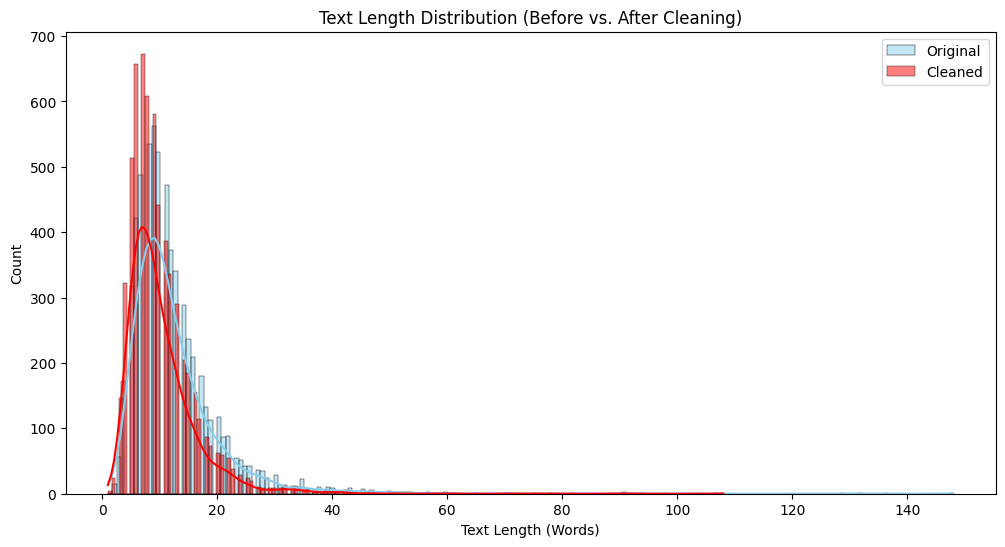

In [ ]:
# Text length comparison
cleand_path = 'original_and_cleaned_claims.csv'
df_original = pd.read_csv(cleand_path) # Load original DataFrame to access 'claim' column
df_original['original_length'] = df_original['claim'].apply(lambda x: len(x.split()))
df['cleaned_length'] = df['cleaned_claim'].apply(lambda x: len(x.split()))

plt.figure(figsize=(12, 6))
sns.histplot(df_original['original_length'], color="skyblue", label="Original", kde=True)
sns.histplot(df['cleaned_length'], color="red", label="Cleaned", kde=True)
plt.title("Text Length Distribution (Before vs. After Cleaning)")
plt.xlabel("Text Length (Words)")
plt.legend()
plt.show()

In [ ]:

articles_df['cleaned_length'] = articles_df['cleaned_claim'].apply(lambda x: len(x.split()))

summary = articles_df.groupby('normalized_label').agg({
    'cleaned_claim': 'count',
    'cleaned_length': 'mean'
}).rename(columns={
    'cleaned_claim': 'عدد العبارات',
    'cleaned_length': 'متوسط الطول'
})
summary.style\
    .format({'متوسط الطول': '{:.1f}'})\
    .set_caption('ملخص البيانات حسب التصنيف')\
    .set_table_styles([
        {'selector': 'caption',
         'props': [('font-size', '24pt'), ('font-weight', 'bold'), ('text-align', 'center'), ('color', '#C71585')]},
        {'selector': 'th',
         'props': [('background-color', '#FFB6C1'), ('color', '#8B008B'), ('font-weight', 'bold'), ('text-align', 'center'), ('font-size', '14pt')]},
        {'selector': 'td',
         'props': [('text-align', 'center'), ('font-size', '12pt'), ('color', '#DB7093')]},
        {'selector': 'table',
         'props': [('border-collapse', 'collapse'), ('width', '80%'), ('border', '2px solid #FF69B4')]}
    ])\
    .hide(axis="index")\
    .set_properties(**{'font-size': '14pt', 'font-weight': 'bold'})

عدد العبارات,متوسط الطول
4037,9.6
1891,11.6
90,9.9
198,11.2
6,8.5


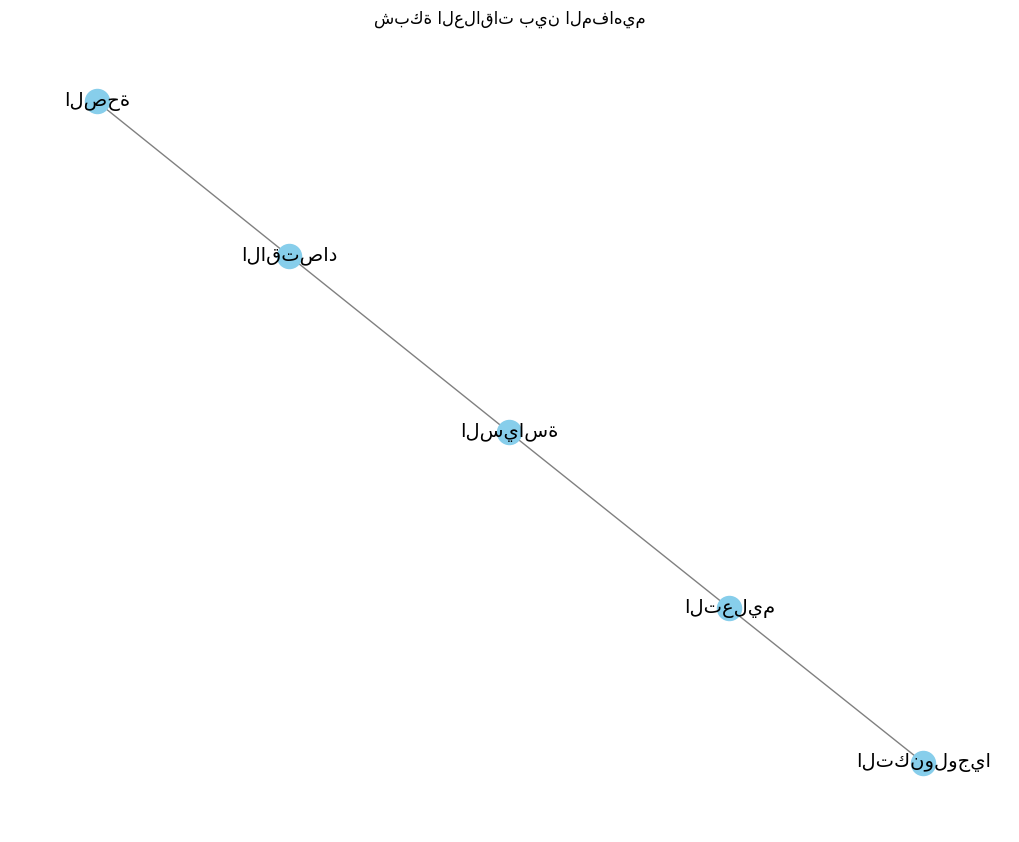

In [ ]:
import networkx as nx

# Extract unique labels from dataset
unique_labels = df['label'].unique().tolist()

# Define relationships based on shared claim categories (linking first 5 labels)
edges = [(unique_labels[i], unique_labels[i+1]) for i in range(len(unique_labels)-1) if i < 5]

# Create graph
G = nx.Graph()
G.add_nodes_from(unique_labels)
G.add_edges_from(edges)

plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_family='Noto Naskh Arabic',
        node_color='skyblue', edge_color='gray', font_size=14)

plt.title("شبكة العلاقات بين الفئات في مجموعة البيانات", fontname='Noto Naskh Arabic', fontsize=16)
plt.show()

<ipython-input-75-01a6f781251e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='التكرار', y='الفئة', data=label_counts, palette="viridis")


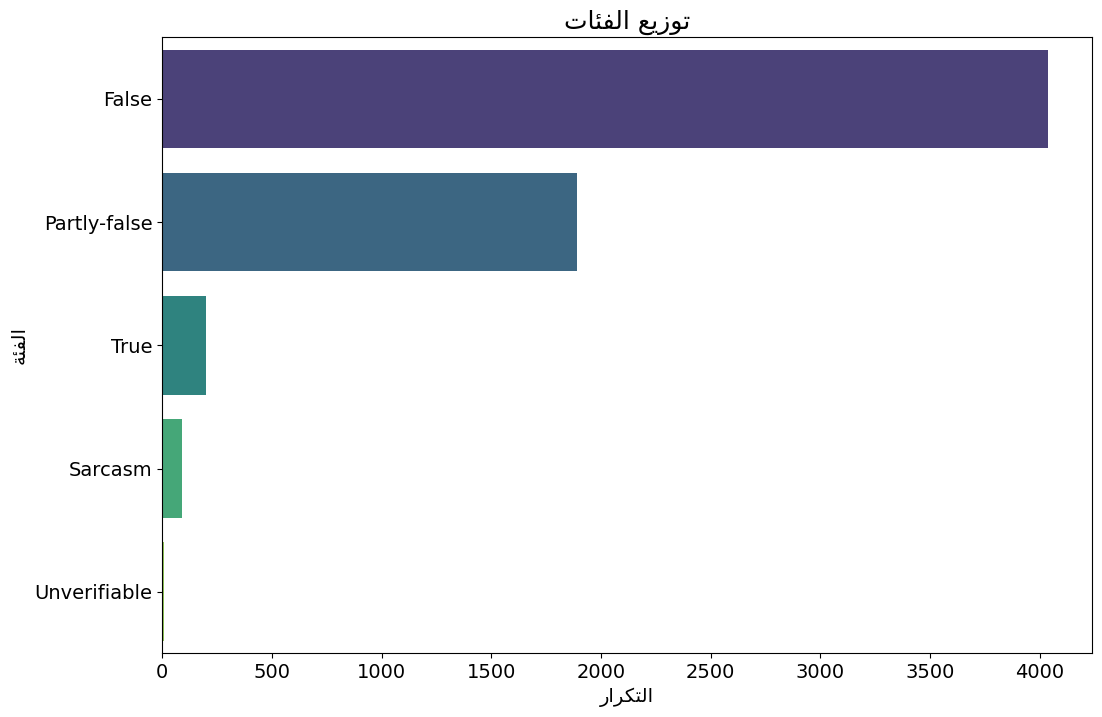

In [ ]:
# حساب تكرار الفئات
label_counts = articles_df['normalized_label'].value_counts().reset_index()
label_counts.columns = ['الفئة', 'التكرار']

# الرسم
plt.figure(figsize=(12, 8))
sns.barplot(x='التكرار', y='الفئة', data=label_counts, palette="viridis")
plt.title(format_arabic('توزيع الفئات'), fontsize=18)
plt.xlabel(format_arabic('التكرار'), fontsize=14)
plt.ylabel(format_arabic('الفئة'), fontsize=14)
plt.show()

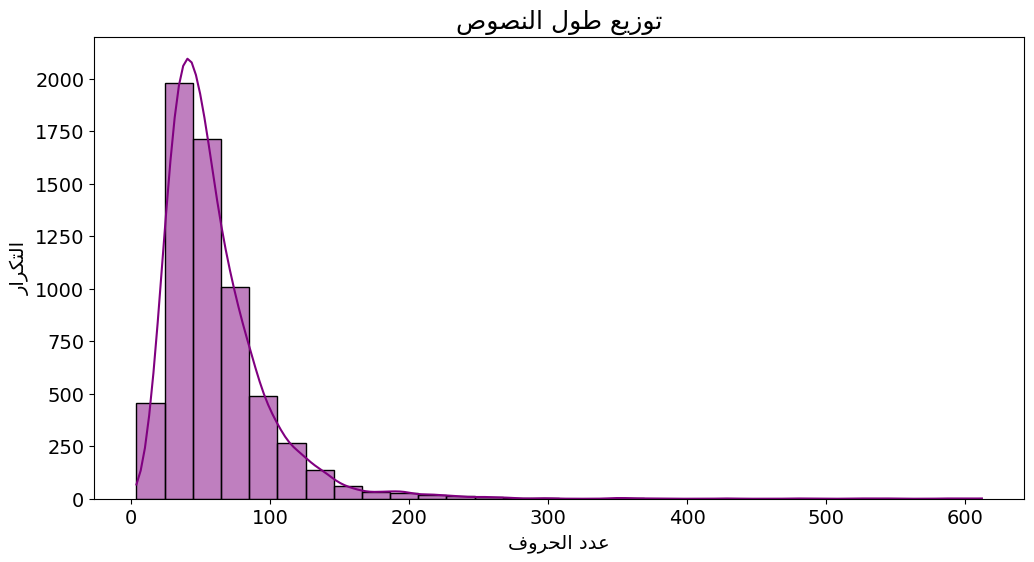

In [ ]:

articles_df['text_length'] = articles_df['cleaned_claim'].apply(len)


plt.figure(figsize=(12, 6))
sns.histplot(articles_df['text_length'], bins=30, kde=True, color='purple')
plt.title(format_arabic('توزيع طول النصوص'), fontsize=18)
plt.xlabel(format_arabic('عدد الحروف'), fontsize=14)
plt.ylabel(format_arabic('التكرار'), fontsize=14)
plt.show()

In [ ]:
import plotly.express as px


fig = px.bar(
    label_counts,
    x='التكرار',
    y='الفئة',
    title=format_arabic('labels distrbution'),
    labels={'التكرار': 'التكرار', 'الفئة': 'الفئة'},
    color='التكرار',
    color_continuous_scale='Viridis'
)
fig.show()

# مخطط توزيع تفاعلي
fig = px.histogram(
    articles_df,
    x='text_length',
    nbins=50,
    title=format_arabic('text length dis'),
    labels={'text_length': 'عدد الحروف'}
)
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
sampled_df = articles_df.sample(min(500, len(articles_df)), replace=False)
mean_text_length_by_label = sampled_df.groupby('normalized_label')['text_length'].transform('mean')

fig = px.scatter(
    sampled_df,
    x='text_length',
    y=mean_text_length_by_label,
    color='normalized_label',
    hover_data=['cleaned_claim'],
    title=format_arabic('Relationship between Text Length and mean'),
    labels={
        'text_length': format_arabic('Text Length'),
        'y': format_arabic('mean')
    }
)
fig.update_layout(
    font_family='Noto Naskh Arabic',
    hoverlabel=dict(font_family='Noto Naskh Arabic')
)
fig.show()